# Chapter 4
## NumPy Basics: Arrays and Vectorized Computation
- efficient array package
- many packages depends on numpy

### Our focus:
- Fast array-based operations for data munging and cleaning, subsetting and filtering, transformation, and any other kind of computation
- Common array algorithms like sorting, unique, and set operations
- Efficient descriptive statistics and aggregating/summarizing data
- Data alignment and relational data manipulations for merging and joining heterogeneous datasets
- Expressing conditional logic as array expressions instead of loops with if-elif-else branches
- Group-wise data manipulations (aggregation, transformation, and function application)

In [1]:
import numpy as np
array = np.arange(1_000_000) # we can add _ for readability!
l = [x for x in range(1_000_000)]

In [17]:
%timeit?
# https://stackoverflow.com/questions/48258008/n-and-r-arguments-to-ipythons-timeit-magic/59543135#59543135
# gives an explanation of why there are runs and loops (measurement error of clock basically?)

In [2]:
# now lets time when do some operation to see efficiency difference
%timeit array2 = array*2
%timeit l2 = [x*2 for x in l]

1.14 ms ± 24.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
61.1 ms ± 595 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
61.1/1.14 # 50 times faster with numpy than built-in list!

53.59649122807018

### Conclusion: Numpy arrays are much faster than lists (at least for vectorized computations!)

In [6]:
ar = np.array([[1.5, -0.1, 3], 
               [0, -3, 6.5]])
ar

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

A ndarray is a container meant for for homogeneous data - all elements ought to be the same

In [7]:
ar.dtype

dtype('float64')

we can create an array with mixed types, the numpy array then gets a mixed dtype which many methods will not accept

In [8]:
numpy_arr = np.array([1,2,"Hello",3,"World"])
numpy_arr.dtype
numpy_arr*2

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U11'), dtype('int32')) -> None

### Creating a ndarray

In [9]:
# we can write
ar = np.array([6, 7.5, 8, 0, 1])

# or
l = [6, 7.5, 8, 0, 1]
np.array(l)

# 2-dim
ar2d = np.array([[6, 7.5, 8, 0, 1],[6, 7.5, 8, 0, 1]])

# or
l = [6, 7.5, 8, 0, 1], [6, 7.5, 8, 0, 1]
np.array(l)

array([[6. , 7.5, 8. , 0. , 1. ],
       [6. , 7.5, 8. , 0. , 1. ]])

- ndarrays have data types which can be seen by type .dtype
- unless explicitly stating np.array(..., dtype= wanted type ) then a dtype is inferred from the inputs
- dtypes can be changed using 'astype'-method

In [10]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
arr_new = arr.astype(np.float64)
print(arr_new.dtype)

int32
float64


One might have to convert an array of strings representing numbers as follows:

In [79]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

### Shapes and pre-filled ndarrays:

In [47]:
# getting the shape of a ndarray
ar2d.shape

(2, 5)

In [81]:
np.arange(10) # works like [x for x in range(10)]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
print( np.zeros(10) )
print( np.ones(10), '\n' )
print( np.ones((5,5)), '\n')
print( np.eye(3,3) )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Arithmetic
no for loops needed, we can do batch operations called vectorization in numpy

In [83]:
arr = np.array([[1., 2., 3.], 
                [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [89]:
print(arr + arr, '\n') # elementwise
print(arr**2, '\n') # elementwise
print(1/arr, '\n') # elementwise

arr*1/2 > 1/arr # elementwise comparison


[[ 2.  4.  6.]
 [ 8. 10. 12.]] 

[[ 1.  4.  9.]
 [16. 25. 36.]] 

[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]] 



array([[False,  True,  True],
       [ True,  True,  True]])

### indexing and slicing

In [95]:
arr = np.arange(10)
print(arr[0], '\n')
print(arr[2:7], '\n')

0 

[2 3 4 5 6] 



- a difference between built-in list is that data is not copied, but slices refer to the corresponding part of the ndarray, a change to the slice changes the ndarray, see the following

In [100]:
print(arr[5:8])

arr_slice = arr[5:8]
print(arr_slice)

arr[5:8] = 12
print(arr_slice)

arr_slice[1]=1000
print(arr)

[12 12 12]
[12 12 12]
[12 12 12]
[   0    1    2    3    4   12 1000   12    8    9]


- if we instead want a copy we use the .copy() method

In [103]:
arr = np.arange(10)
arr_copy = arr.copy()
arr[0] = 100
arr_copy # remains unchanged!

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 2dim

In [104]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [105]:
arr2d[0]

array([1, 2, 3])

In [106]:
arr2d[0,0]

1

In [108]:
arr2d[0,0]==arr2d[0][0]

True

In [25]:
arr = np.arange(15)
print(arr , '\n')  

print(arr.reshape((3, 5)) , '\n')
                  
print(arr.T)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


## Pseudo RNG

In [ ]:
samples = np.random.standard_normal(size=(4, 4))
samples

Python's random module samples one value at a time while numpy generates a vector. Let's see the difference in efficiency for a large sample.

In [49]:
from random import normalvariate
N = 1_000_000
%timeit samples = [normalvariate(0,1) for _ in range(N)]
%timeit np.random.standard_normal(N)

675 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.6 ms ± 525 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Conclusion: Use numpy for large samples.

### VECTORIZATION: The practice of replacing loops with array expressions. Usually siginficantly faster.

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$')

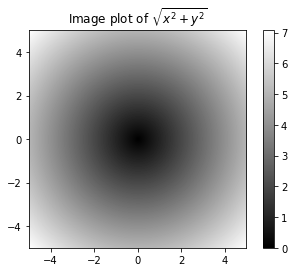

In [65]:
points= np.arange(-5,5,0.01) # equally space points starting at -5 and ending at 5 with distance 0.01 between
xs, ys = np.meshgrid(points, points) # Cartesian product
zs = np.sqrt(xs**2 + ys**2)

# plotting preview
import matplotlib.pyplot as plt
plt.imshow(zs, cmap=plt.cm.gray, extent=[-5,5,-5,5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$")

In [66]:
plt.close("all")

In [76]:
arr = np.random.standard_normal((4, 4))
cond = arr > 0
np.where(cond, 1, -1) # where(condition, if condition, else)


array([[-1,  1, -1,  1],
       [ 1, -1, -1, -1],
       [ 1, -1, -1, -1],
       [ 1, -1,  1,  1]])

## Mathematical and Statistical Methods / Aggregations

In [97]:
rng = np.random.default_rng(seed=12345) # generator object with seed for re-producability
arr = rng.standard_normal((5, 4))
print(arr,'\n')

print(np.sum(arr),'\n')
print(np.mean(arr),'\n')
print(np.mean(arr[:,0]),'\n')

np.std(arr, axis=1) # standard deviation along rows

[[-1.42382504  1.26372846 -0.87066174 -0.25917323]
 [-0.07534331 -0.74088465 -1.3677927   0.6488928 ]
 [ 0.36105811 -1.95286306  2.34740965  0.96849691]
 [-0.75938718  0.90219827 -0.46695317 -0.06068952]
 [ 0.78884434 -1.25666813  0.57585751  1.39897899]] 

0.021223322497782027 

0.0010611661248891013 

-0.22173061326311264 



array([1.00418239, 0.75122417, 1.55315999, 0.6275618 , 0.99026164])

In [118]:
#rng = np.random.default_rng(seed=12345) # Seed has to be set a-new for reproducability
arr = rng.standard_normal(100) 
(arr>0).sum() # n pos values

47

In [120]:
bools = np.array([False, False, True, False])
print(bools.any()) #returns 'True' if any true #or
print(bools.all()) #returns 'True' if all true #and

True
False


### Sorting

In [124]:
#rng = np.random.default_rng(seed=12345)
arr = np.random.default_rng(seed=12345).standard_normal(6)
arr

array([-1.42382504,  1.26372846, -0.87066174, -0.25917323, -0.07534331,
       -0.74088465])

In [130]:
arr.sort() # sorts the object arr, that is, modifies the existing object
arr

array([[-1.41229201, -1.22867499, -1.20938829],
       [-0.95898831, -0.65876032,  0.25755777],
       [-0.13081169, -0.09296246,  0.7519394 ],
       [-0.06615089,  0.31290292,  0.77736134],
       [ 0.54154683,  0.8286332 ,  1.26998312]])

In [129]:
arr = rng.standard_normal((5, 3))
print(arr)
arr.sort(axis=0) # sort along each column 
arr

[[ 0.77736134  0.8286332  -0.95898831]
 [-1.20938829 -1.41229201  0.54154683]
 [ 0.7519394  -0.65876032 -1.22867499]
 [ 0.25755777  0.31290292 -0.13081169]
 [ 1.26998312 -0.09296246 -0.06615089]]


array([[-1.20938829, -1.41229201, -1.22867499],
       [ 0.25755777, -0.65876032, -0.95898831],
       [ 0.7519394 , -0.09296246, -0.13081169],
       [ 0.77736134,  0.31290292, -0.06615089],
       [ 1.26998312,  0.8286332 ,  0.54154683]])

### Unique and Other SET LOGIC

In [2]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)


array(['Bob', 'Joe', 'Will'], dtype='<U4')

in1d test for member ship: for each value in values, is it in the [2,3,6] as well?

In [3]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## File input and output with Arrays
We can save numpy arrays as files using save and load

In [13]:
arr = np.arange(10)
np.save("some_array", arr)
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Linear Algebra

In [19]:
from numpy.linalg import inv, qr
X = np.random.standard_normal((5, 5))
print(X, '\n')
print(X@X, '\n')
print(X@inv(X))

[[ 0.9862545  -0.54016969 -1.93899189  0.04745307  0.02272433]
 [ 1.0489487   0.55893693  0.4355303  -0.80863758 -0.50602344]
 [-1.03424913 -1.02310564  1.12809239  1.24647971 -0.51970639]
 [ 0.03340335  0.70762215  2.19802028 -0.12465724  0.60961595]
 [-0.33052433  0.34624346 -0.42268846  0.86654356 -0.41963487]] 

[[ 2.40556246  1.19057496 -4.24026422 -1.91953547  1.3228492 ]
 [ 1.31062155 -1.44721047 -2.86266217 -0.19701071 -0.76595969]
 [-3.04653454 -0.46524746  5.79186117  1.57865669  0.88589682]
 [-1.70375389 -1.74846897  2.19131523  2.71296111 -1.83144866]
 [ 0.64202068  1.27241202  2.39690701 -1.29419528  0.74130784]] 

[[ 1.00000000e+00 -9.11366813e-17  6.04635999e-18 -1.07531830e-16
  -1.58731351e-16]
 [-3.88162808e-18  1.00000000e+00 -6.32446716e-19 -1.72487123e-18
  -1.36958365e-17]
 [-7.62173756e-17  2.24855952e-16  1.00000000e+00 -1.29215571e-16
   4.72766846e-17]
 [ 6.92573143e-17 -6.22713952e-17  2.60688903e-17  1.00000000e+00
  -1.30476126e-17]
 [ 6.52999328e-17  6.281

there exists most functions one would want in daily use: diag, trace, det, eig, inv, pinv, qr, svd, solve, lstsq etc...

### EXAMPLE:

In [65]:
import random
pos = 0
walk = [pos]
n_steps = 1000
for _ in range(n_steps):
    step = 1 if random.randint(0,1) else -1
    if pos >= -10:
        pos += step
    else:
        pos = 10 # if walk goes below -10 then it bounces up to 10
    walk.append(pos)

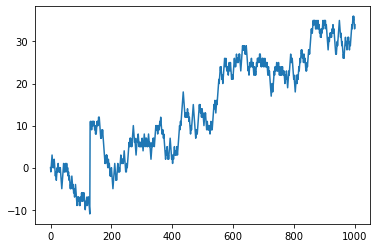

In [66]:
import matplotlib.pyplot as plt
plt.plot(walk)

### EX: Random Walk Statistics

In [69]:
rng = np.random.default_rng(seed=12345) # fixed rng
n_steps = 1000
steps = np.where(rng.integers(0,2, size=n_steps) == 0, 1, -1) # gives the direction of the walk in each step
walk = steps.cumsum() # gives the position of the walk in each step

print('Max point of walk: ', walk.max())
print('Min point of walk: ', walk.min())
print('First time walk has gone above 10 or below -10: ', (np.abs(walk) >= 10).argmin()) 

Max point of walk:  50
Min point of walk:  -8
First time walk has gone above 10 or below -10:  0


### EX: Multiple walks simulated at the same time (Monte Carlo-ish)

In [111]:
n_walks = 5000
n_steps = 10000
steps = np.where(rng.integers(0,2, size=(n_walks, n_steps))  > 0, 1, -1) # each row is a walk
walks = steps.cumsum(axis=1)
print(walks)

# estimate probabily of exceeding 30 in some time value during walk
hits30 = (walks >= 30).any(axis=1)
print('Estimated probability: ', sum(hits30)/n_walks)

# find estimated crossing time
crossing_times = (walks[hits30] >= 30).argmax(axis=1)
print('Mean crossing time: ', crossing_times.mean())

[[   1    0   -1 ... -228 -227 -228]
 [   1    0   -1 ...  102  101  100]
 [   1    2    3 ...   72   73   72]
 ...
 [   1    2    3 ...    8    7    6]
 [   1    2    3 ...  -42  -43  -42]
 [   1    2    3 ...   60   61   60]]
Estimated probability:  0.7556
Mean crossing time:  2081.157755426151
